## Data Source : https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis


In [1]:
conda install seaborn

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.12.0

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [103]:
conda install -c conda-forge python-kaleido

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.12.0

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /home/studio-lab-user/.conda/envs/default

  added / updated specs:
    - python-kaleido


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.5.18.1|       ha878542_0         144 KB  conda-forge
    certifi-2022.5.18.1        |   py39hf3d152e_0         150 KB  conda-forge
    expat-2.4.8                |       h27087fc_0         187 KB  conda-forge
    font-ttf-dejavu-sans-mono-2.37|       hab24e00_0         388 KB  conda-forge
    font-ttf-inconsolata-3.000 |       h77eed37_0          94 KB  conda-forge
    font-ttf-source-code-pro-2.038|       h77eed37_0         684 KB  conda-forge
    font-ttf-ubuntu-0.83       |       hab24e00_0

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.axes
import pickle

import plotly as py
import plotly.graph_objs as go

from datetime import datetime
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, classification_report

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn import metrics
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support, classification_report 
from sklearn.metrics import precision_recall_curve, confusion_matrix, roc_curve, auc
from sklearn.pipeline import Pipeline

In [3]:
# Define the color palette 
Viridis=[
"#440154", "#440558", "#450a5c", "#450e60", "#451465", "#461969",
"#461d6d", "#462372", "#472775", "#472c7a", "#46307c", "#45337d",
"#433880", "#423c81", "#404184", "#3f4686", "#3d4a88", "#3c4f8a",
"#3b518b", "#39558b", "#37598c", "#365c8c", "#34608c", "#33638d",
"#31678d", "#2f6b8d", "#2d6e8e", "#2c718e", "#2b748e", "#29788e",
"#287c8e", "#277f8e", "#25848d", "#24878d", "#238b8d", "#218f8d",
"#21918d", "#22958b", "#23988a", "#239b89", "#249f87", "#25a186",
"#25a584", "#26a883", "#27ab82", "#29ae80", "#2eb17d", "#35b479",
"#3cb875", "#42bb72", "#49be6e", "#4ec16b", "#55c467", "#5cc863",
"#61c960", "#6bcc5a", "#72ce55", "#7cd04f", "#85d349", "#8dd544",
"#97d73e", "#9ed93a", "#a8db34", "#b0dd31", "#b8de30", "#c3df2e",
"#cbe02d", "#d6e22b", "#e1e329", "#eae428", "#f5e626", "#fde725"]
# source: https://bhaskarvk.github.io/colormap/reference/colormap.html

## Decision Trees with Scikit learn

## Import Data


In [4]:
market_df = pd.read_csv('data/marketing_campaign.csv')
market_df.shape

(2240, 29)

## Explore data
- Transform cols
- Drop cols


In [5]:
market_df.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0


In [6]:
# Change birth year to age, customer date to years

def years_customer(inp_date):
    format_Dt = pd.to_datetime(inp_date, format="%d-%m-%Y")
    today = datetime.today()
    return today.year - format_Dt.year - ((today.month, today.day) < (format_Dt.month, format_Dt.day))

market_df['Yrs_Customer'] = market_df['Dt_Customer'].apply(lambda x: years_customer(x))

market_df['age'] = 2022 - market_df['Year_Birth']

market_df.drop(columns=['Z_CostContact','Z_Revenue','Dt_Customer','Year_Birth', 'Complain', 'ID'], inplace=True)

market_df.head(2)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Yrs_Customer,age
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,4,7,0,0,0,0,0,1,9,65
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,2,5,0,0,0,0,0,0,8,68


In [7]:
market_df['Marital_Status'] = market_df['Marital_Status'].replace(['Married', 'Together'],'Relationship')
market_df['Marital_Status'] = market_df['Marital_Status'].replace(['Divorced', 'Widow'],'NewlySingle')
market_df['Marital_Status'] = market_df['Marital_Status'].replace(['Alone', 'YOLO', 'Absurd'],'Single')
market_df.head(2)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Yrs_Customer,age
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,4,7,0,0,0,0,0,1,9,65
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,2,5,0,0,0,0,0,0,8,68


In [8]:
market_df['Education'] = market_df['Education'].replace(['2n Cycle','Graduation'],'Graduate') #simplifing education
market_df['Education'] = market_df['Education'].replace(['Basic'], 'Under Graduate')
market_df['Education'] = market_df['Education'].replace(['PhD','Master'], 'Post Graduate')
market_df.head(2)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Yrs_Customer,age
0,Graduate,Single,58138.0,0,0,58,635,88,546,172,...,4,7,0,0,0,0,0,1,9,65
1,Graduate,Single,46344.0,1,1,38,11,1,6,2,...,2,5,0,0,0,0,0,0,8,68


In [9]:
# calculate total amount spent, drop inidvidual cols.

#market_df['MntSpent'] = market_df['MntWines'] + market_df['MntFruits'] +market_df['MntMeatProducts'] + market_df['MntFishProducts'] +market_df['MntSweetProducts'] + market_df['MntGoldProds']
#market_df.drop(columns=['MntWines','MntFruits','MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], inplace=True)
market_df.head(2)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Yrs_Customer,age
0,Graduate,Single,58138.0,0,0,58,635,88,546,172,...,4,7,0,0,0,0,0,1,9,65
1,Graduate,Single,46344.0,1,1,38,11,1,6,2,...,2,5,0,0,0,0,0,0,8,68


In [10]:
#market_df['PriorCampaign']=np.where((market_df['AcceptedCmp1']==1)|(market_df['AcceptedCmp2']==1)|(market_df['AcceptedCmp3']==1)|(market_df['AcceptedCmp4']==1)|(market_df['AcceptedCmp5']==1), 1, 0) # Accepted any campaign
#market_df['PriorCampaign']=market_df['AcceptedCmp5']
#market_df.drop(columns=['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5'], inplace=True)
market_df.head(2)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Yrs_Customer,age
0,Graduate,Single,58138.0,0,0,58,635,88,546,172,...,4,7,0,0,0,0,0,1,9,65
1,Graduate,Single,46344.0,1,1,38,11,1,6,2,...,2,5,0,0,0,0,0,0,8,68


In [11]:
#market_df['NumPurchases'] = market_df['NumDealsPurchases'] + market_df['NumWebPurchases'] +market_df['NumCatalogPurchases'] + market_df['NumStorePurchases']
#market_df.drop(columns=['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases'], inplace=True)
market_df.head(2)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Yrs_Customer,age
0,Graduate,Single,58138.0,0,0,58,635,88,546,172,...,4,7,0,0,0,0,0,1,9,65
1,Graduate,Single,46344.0,1,1,38,11,1,6,2,...,2,5,0,0,0,0,0,0,8,68


In [12]:
test_df = market_df

# create dummy variables
#test_df = pd.get_dummies(market_df)
#test_df.head()


In [13]:
test_df.head(1)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Yrs_Customer,age
0,Graduate,Single,58138.0,0,0,58,635,88,546,172,...,4,7,0,0,0,0,0,1,9,65


In [14]:
test_df.drop(columns=['Kidhome','AcceptedCmp1','AcceptedCmp4'], inplace=True)

## Cleaning

In [15]:
test_df.isnull().sum()

Education               0
Marital_Status          0
Income                 24
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp5            0
AcceptedCmp2            0
Response                0
Yrs_Customer            0
age                     0
dtype: int64

In [16]:
# replace the missing Income values with the mean
test_df['Income'].fillna(test_df['Income'].mean(), inplace=True)

## Use Onehot encoder and label encoder

In [17]:
# Create label encoder instance
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
lb = LabelEncoder() 

In [18]:
# others
test_df['Education_'] = lb.fit_transform(test_df['Education']) 
test_df['Marital_Status_'] = lb.fit_transform(test_df['Marital_Status'] ) 

In [19]:
test_df.head()

,Education,Marital_Status,Income,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp5,AcceptedCmp2,Response,Yrs_Customer,age,Education_,Marital_Status_
0,Graduate,Single,58138.0,0,58,635,88,546,172,88,...,4,7,0,0,0,1,9,65,0,2
1,Graduate,Single,46344.0,1,38,11,1,6,2,1,...,2,5,0,0,0,0,8,68,0,2
2,Graduate,Relationship,71613.0,0,26,426,49,127,111,21,...,10,4,0,0,0,0,8,57,0,1
3,Graduate,Relationship,26646.0,0,26,11,4,20,10,3,...,4,6,0,0,0,0,8,38,0,1
4,Post Graduate,Relationship,58293.0,0,94,173,43,118,46,27,...,6,5,0,0,0,0,8,41,1,1


In [20]:
test_df.head(1).T

,0
Education,Graduate
Marital_Status,Single
Income,58138.0
Teenhome,0
Recency,58
MntWines,635
MntFruits,88
MntMeatProducts,546
MntFishProducts,172
MntSweetProducts,88


# Set training data


In [21]:
# Assign feature and target variables
X = test_df.drop(columns=['Response','Education','Marital_Status'], axis=1)
y = test_df['Response']


In [22]:
# split the  data
SEED=1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

## Split the pandas dummy data
#X_train, X_test , y_train,y_test = train_test_split(X_dummy, y, test_size = 0.4, random_state = 42) 



# Build Decision Tree

In [23]:
# Instantiate

clf= DecisionTreeClassifier(criterion='entropy', random_state=SEED)
# clf= DecisionTreeClassifier(criterion='gini')

# Fit the model
clf.fit(X_train,y_train) 

# Generate inferences
y_pred = clf.predict(X_test)

In [24]:
# compare predictions vs. actual labels
print(list(y_pred))
print(list(y_test))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 

# Evaluate Model Performance

In [25]:
# Look at feature importance
print(len(clf.feature_importances_))

clf.feature_importances_

21


array([0.09394593, 0.01433352, 0.11826287, 0.05755263, 0.03220031,
       0.0738139 , 0.04001473, 0.02261273, 0.06550885, 0.01904175,
       0.04118884, 0.02366504, 0.02877516, 0.04308949, 0.05190997,
       0.11045611, 0.00801078, 0.05588225, 0.0795741 , 0.00754133,
       0.01261971])

In [26]:
## put feature importance into a dataframe - uncomment only one statement below.

# use this if you used the one-hot encoded data
fi = pd.DataFrame({'feature':X.columns, 'importance':clf.feature_importances_})
fi=fi.set_index('feature')
fi

,importance
feature,
Income,0.093946
Teenhome,0.014334
Recency,0.118263
MntWines,0.057553
MntFruits,0.032200
MntMeatProducts,0.073814
MntFishProducts,0.040015
MntSweetProducts,0.022613
MntGoldProds,0.065509


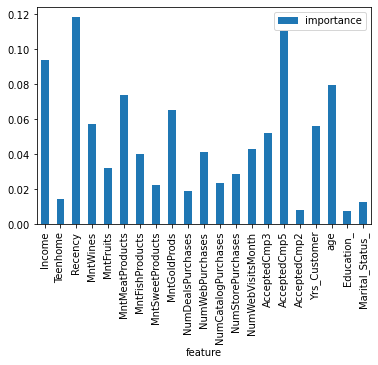

In [27]:
fi.plot(kind='bar');

In [28]:
# look at the class balance again.
y_train.value_counts(normalize=True)

0    0.855867
1    0.144133
Name: Response, dtype: float64

In [29]:
# Baseline model is defined by the most frequent class in our training data

y_baseline = y_train.value_counts().index[0]
baseline_acc = round(y_train.value_counts(normalize=True)[y_baseline]*100,2)
print(f'Most Frequent Category: {y_baseline}')
print(f'Percentage Most Frequent Category: {baseline_acc}%')

Most Frequent Category: 0
Percentage Most Frequent Category: 85.59%


In [30]:
# Calculate Accuracy , AUC and Confusion matrix 
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.8080357142857143

In [31]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

array([[496,  68],
       [ 61,  47]])

In [32]:
# get roc auc info
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

In [33]:
print("Accuracy is : "+ str(round(accuracy,3)*100)+"%")
print("AUC is : "+str(round(roc_auc,3)))

Accuracy is : 80.80000000000001%
AUC is : 0.657


# Save things

In [34]:
roc_dict={'FPR':list(fpr), 
            'TPR':list(tpr),
            'y_test':list(y_test), 
            'predictions':[int(i) for i in y_pred]
           }

In [35]:
# Save everything we need to reproduce the ROC-AUC figure in plotly dash.
import json
with open('resources/roc_dict_A.json', 'w') as f:
    json.dump(roc_dict, f)

In [36]:
# A confusion matrix tells us our false positives and false negatives:
matrix=confusion_matrix(y_test, y_pred)
print(matrix)


[[496  68]
 [ 61  47]]


In [37]:
cm=pd.DataFrame(matrix, columns=['pred: ignored', 'pred: responded'])
cm

,pred: ignored,pred: responded
0,496,68
1,61,47


In [38]:
cm[f'n={len(y_test)}']=['actual: ignored', 'actual: responded']
cm=cm[[f'n={len(y_test)}', 'pred: ignored', 'pred: responded']]
cm

,n=672,pred: ignored,pred: responded
0,actual: ignored,496,68
1,actual: responded,61,47


In [39]:
# Save cm dataframe to a pickle file, for later use in plotly dash app
cm.to_csv('resources/confusion_matrix_A.csv', index=False)
cm=pd.read_csv('resources/confusion_matrix_A.csv')
cm

,n=672,pred: ignored,pred: responded
0,actual: ignored,496,68
1,actual: responded,61,47


In [40]:
# save the feature importance values to a csv file, for later use by plotly dash app.
fi.to_csv('resources/feature_importance.csv', index=False)

In [41]:
clf_report =   classification_report(y_test, y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       564
           1       0.41      0.44      0.42       108

    accuracy                           0.81       672
   macro avg       0.65      0.66      0.65       672
weighted avg       0.81      0.81      0.81       672



In [42]:
cl_report = classification_report(y_test, y_pred, output_dict=True)
cl_report_df = pd.DataFrame(cl_report).transpose()
cl_report_df

,precision,recall,f1-score,support
0,0.890485,0.879433,0.884924,564.000000
1,0.408696,0.435185,0.421525,108.000000
accuracy,0.808036,0.808036,0.808036,0.808036
macro avg,0.649590,0.657309,0.653224,672.000000
weighted avg,0.813054,0.808036,0.810449,672.000000


In [43]:
cl_report_df.to_csv('resources/class_report_A.csv', index=False)

In [44]:
cr=pd.read_csv('resources/class_report_A.csv')
trace = go.Table(
        header=dict(values=cr.columns,
                line = dict(color='#7D7F80'),
                fill = dict(color=Viridis[55]),
                align = ['left'] * 5),
        cells=dict(values=['', cr['precision'], cr['recall'], cr['f1-score'], cr['support']],
                line = dict(color='#7D7F80'),
                fill = dict(color='white'),
                align = ['left'] * 5))

layout = go.Layout(
    title = f'Classification Report',
)  
    
fig = dict(data=[trace], layout=layout)
fig

{'data': [Table({
      'cells': {'align': [left, left, left, left, left],
                'fill': {'color': 'white'},
                'line': {'color': '#7D7F80'},
                'values': [, [0.8904847396768402, 0.408695652173913,
                           0.8080357142857143, 0.6495901959253766,
                           0.8130543506138698], [0.8794326241134752,
                           0.4351851851851852, 0.8080357142857143,
                           0.6573089046493302, 0.8080357142857143],
                           [0.8849241748438894, 0.42152466367713, 0.8080357142857143,
                           0.6532244192605097, 0.8104492534063745], [564.0, 108.0,
                           0.8080357142857143, 672.0, 672.0]]},
      'header': {'align': [left, left, left, left, left],
                 'fill': {'color': '#6bcc5a'},
                 'line': {'color': '#7D7F80'},
                 'values': array(['precision', 'recall', 'f1-score', 'support'], dtype=object)}
  })],
 'layou

# Plot ROC

Receiver operating characteristic (ROC) Curve for Test Set 0.6573089046493302
Test AUC: 0.6573089046493302


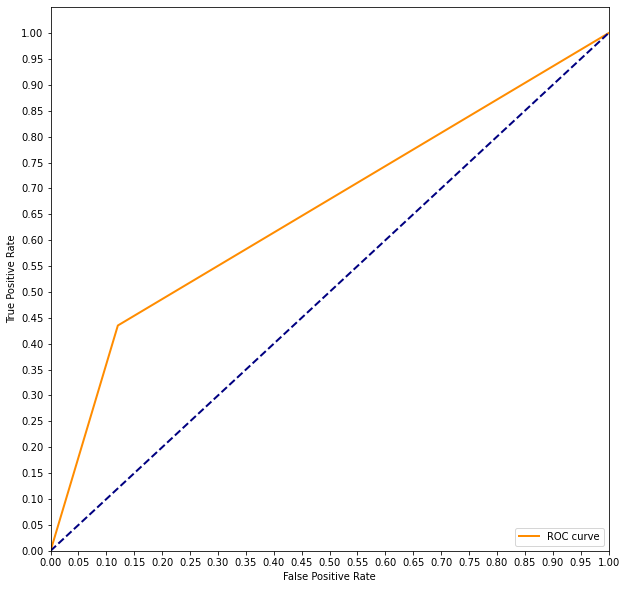

In [45]:
# Plot the ROC 
plt.figure(figsize=(10,10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(print('Receiver operating characteristic (ROC) Curve for Test Set {}'.format(auc(fpr, tpr))))
plt.legend(loc='lower right')
print('Test AUC: {}'.format(auc(fpr, tpr)))
plt.show()

In [46]:
## Compute other confusion matrix metrics

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [47]:
#precision 

precision = tp/(tp+fp)
precision

0.40869565217391307

In [48]:
# Sensitivity (recall) tp/(tp+fn)
sensitivity = tp/(tp+fn)
sensitivity

0.4351851851851852

In [49]:

# Specificity tn/(tn+fp)
specificity = tn/(tn+fp)
specificity

0.8794326241134752

In [50]:
# false negative rate (miss rate) fn/(fn+tp)
fnr = fn/(fn+tp)
fpr = fp/(fp+tn)

In [51]:
print(f'precision: {precision}')
print(f'sensitivity: {sensitivity}')
print(f'specificity: {specificity}')

# f1 score - (2*tp)/(2*tp+fp+fn))
f1 = (2*tp)/(2*tp+fp+fn)
print(f'f1: {f1}')


print(f'fnr: {fnr}')
print(f'fpr: {fpr}')


precision: 0.40869565217391307
sensitivity: 0.4351851851851852
specificity: 0.8794326241134752
f1: 0.42152466367713004
fnr: 0.5648148148148148
fpr: 0.12056737588652482


In [52]:
clf_report =   classification_report(y_test, y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       564
           1       0.41      0.44      0.42       108

    accuracy                           0.81       672
   macro avg       0.65      0.66      0.65       672
weighted avg       0.81      0.81      0.81       672



# Maximum Tree depth

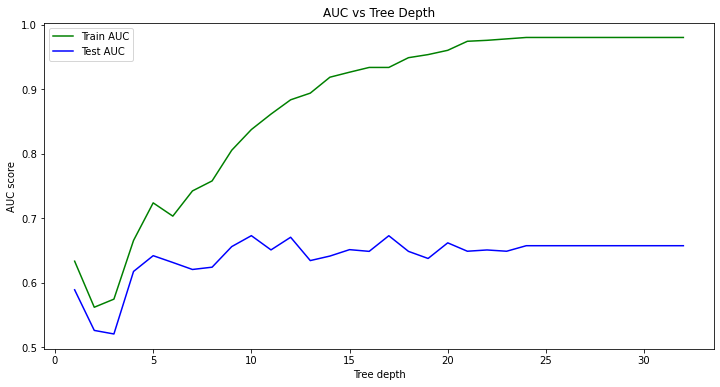

In [73]:
# Identify the optimal tree depth for given data

max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=SEED)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_depths, train_results, 'g', label='Train AUC')
plt.plot(max_depths, test_results, 'b', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.title("AUC vs Tree Depth")
plt.legend()
plt.show()

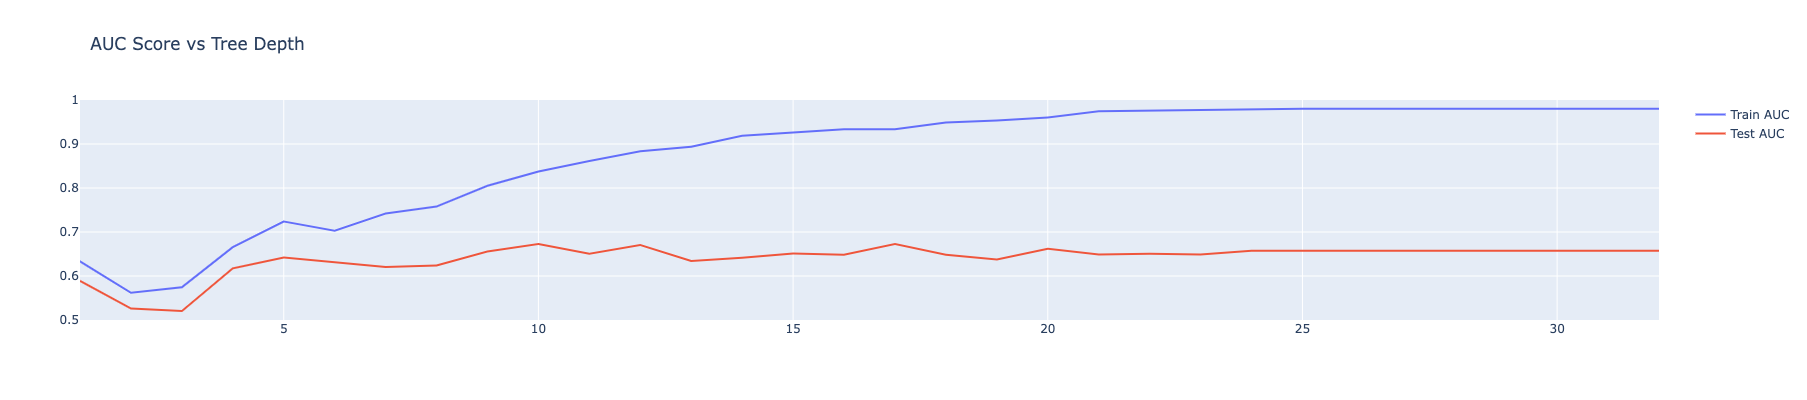

In [74]:
fig1 = go.Figure()

# Add traces
fig1.update_layout(yaxis_range=[0.5,1],title='AUC Score vs Tree Depth', width=1200, height=400)

fig1.add_trace(go.Scatter(x=max_depths, y=train_results,
                    mode='lines',
                    name='Train AUC'))
fig1.add_trace(go.Scatter(x=max_depths, y=test_results,
                    mode='lines',
                    name='Test AUC'))

fig1.show()
fig1.write_image("resources/max_depth.png")

In [75]:
# Maximum Sample Split

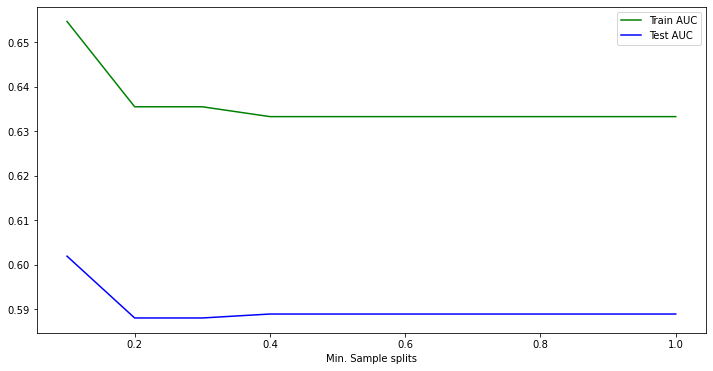

In [76]:
# Identify the optimal min-samples-split for given data
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_split=min_samples_split, random_state=SEED)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, train_results, 'g', label='Train AUC')
plt.plot(min_samples_splits, test_results, 'b', label='Test AUC')
plt.xlabel('Min. Sample splits')
plt.legend()
plt.show()

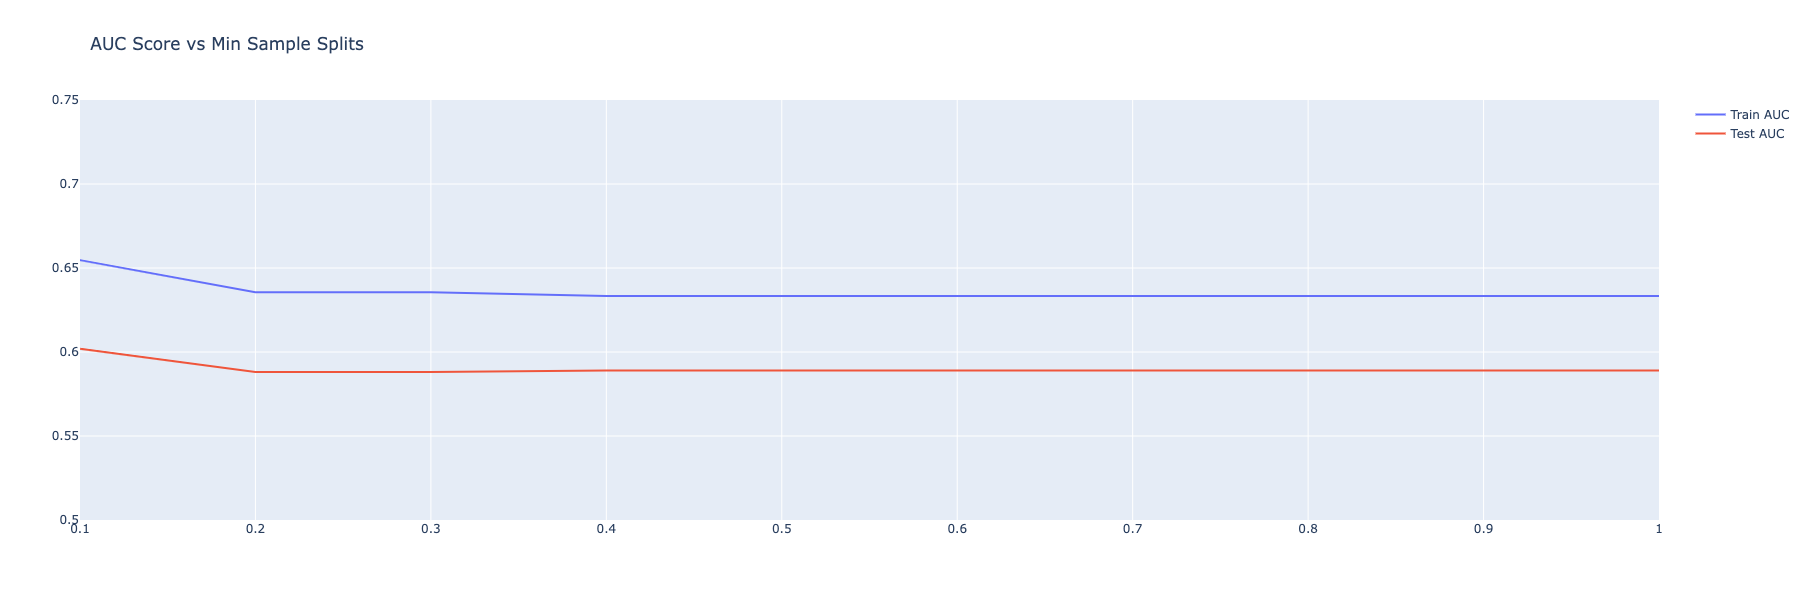

In [77]:
fig1 = go.Figure()

# Add traces
fig1.update_layout(yaxis_range=[0.50,0.75],title='AUC Score vs Min Sample Splits', width=1200, height=600)

fig1.add_trace(go.Scatter(x=min_samples_splits, y=train_results,
                    mode='lines',
                    name='Train AUC'))
fig1.add_trace(go.Scatter(x=min_samples_splits, y=test_results,
                    mode='lines',
                    name='Test AUC'))

fig1.show()
fig1.write_image("resources/min_splits.png")

# Minimum Sample Leafs

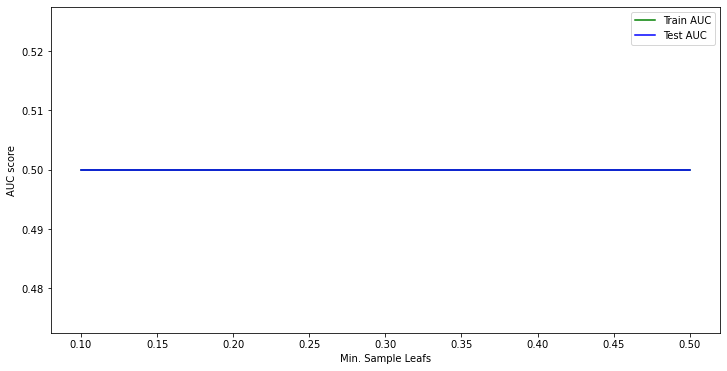

In [78]:
# Calculate the optimal value for minimum sample leafs
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=min_samples_leaf, random_state=SEED)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))    
plt.plot(min_samples_leafs, train_results, 'g', label='Train AUC')
plt.plot(min_samples_leafs, test_results, 'b', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('Min. Sample Leafs')
plt.legend()
plt.show()

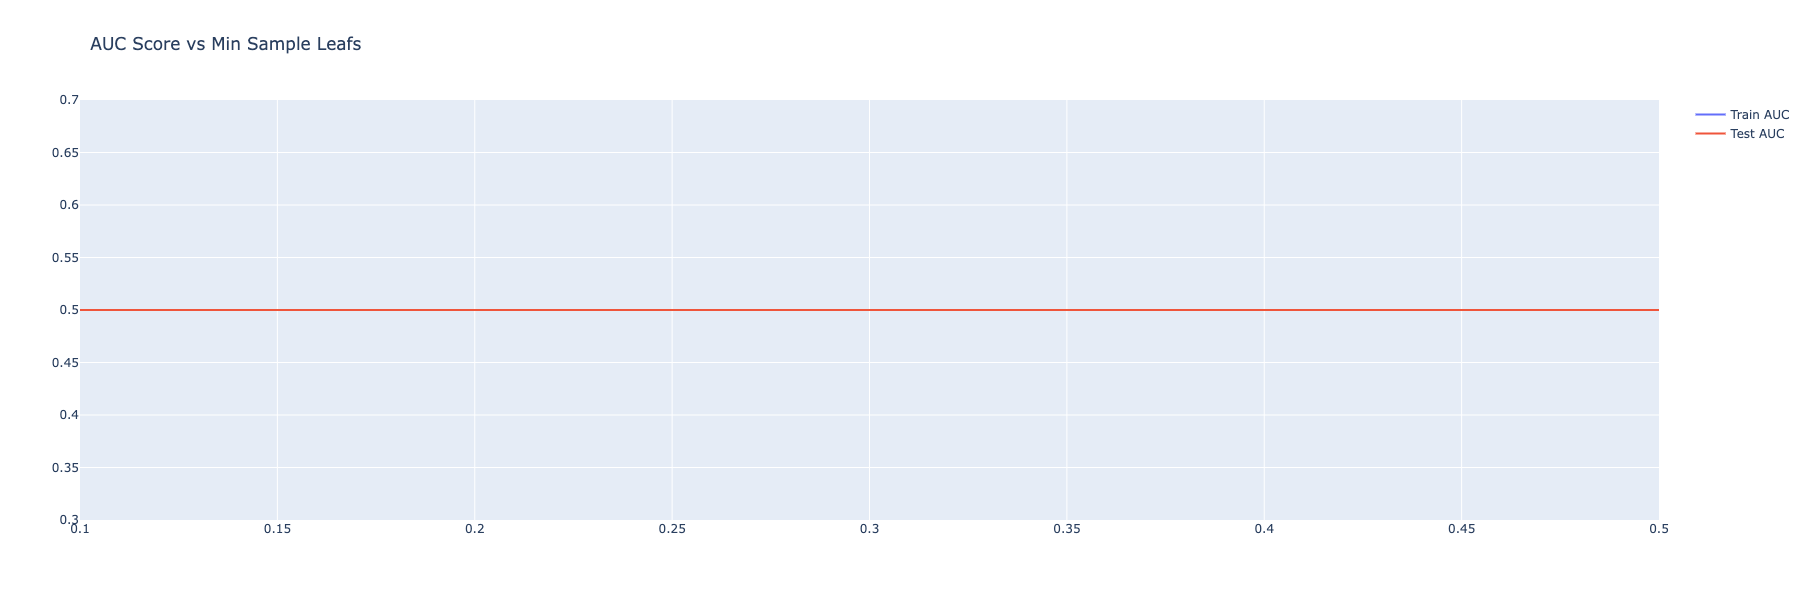

In [79]:
fig1 = go.Figure()

# Add traces
fig1.update_layout(yaxis_range=[0.30,0.70],title='AUC Score vs Min Sample Leafs', width=1200, height=600)

fig1.add_trace(go.Scatter(x=min_samples_leafs, y=train_results,
                    mode='lines',
                    name='Train AUC'))
fig1.add_trace(go.Scatter(x=min_samples_leafs, y=test_results,
                    mode='lines',
                    name='Test AUC'))

fig1.show()
fig1.write_image("resources/min_samples.png")

# Maximum Features

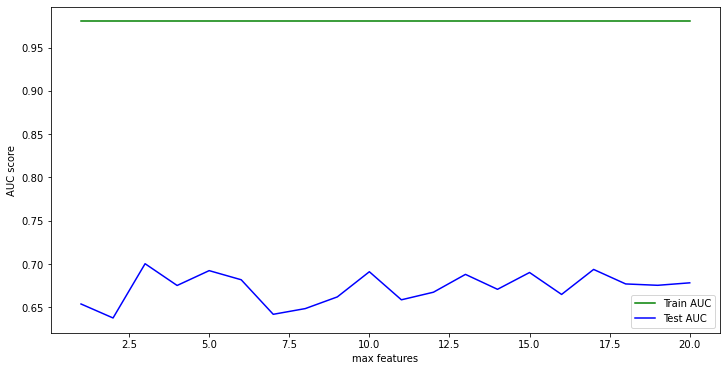

In [80]:
# Find the best value for optimal maximum feature size
max_features = list(range(1, X_train.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    dt = DecisionTreeClassifier(criterion='entropy', max_features=max_feature, random_state=SEED)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_features, train_results, 'g', label='Train AUC')
plt.plot(max_features, test_results, 'b', label='Test AUC')
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.legend()
plt.show()

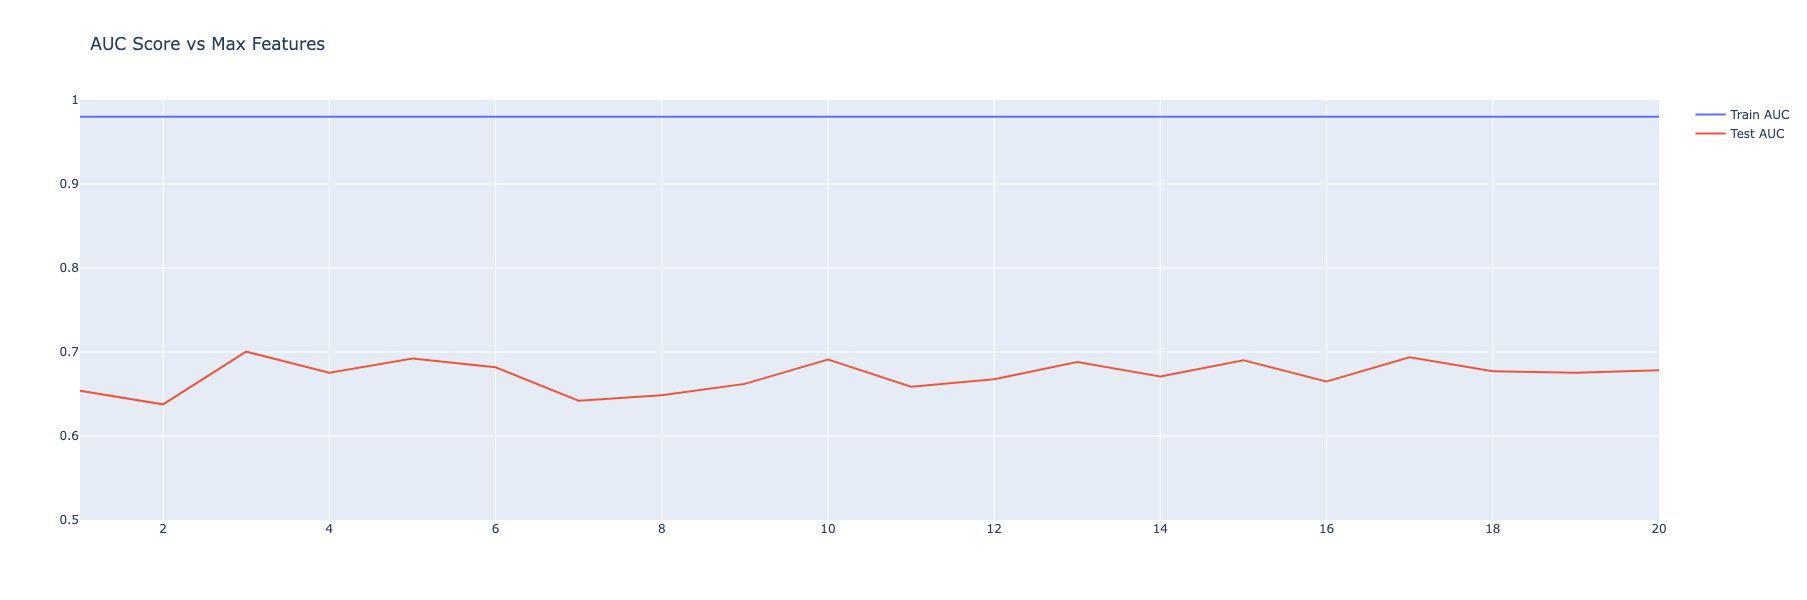

In [83]:
fig1 = go.Figure()

# Add traces
fig1.update_layout(yaxis_range=[0.50,1.0],title='AUC Score vs Max Features', width=1200, height=600)

fig1.add_trace(go.Scatter(x=max_features, y=train_results,
                    mode='lines',
                    name='Train AUC'))
fig1.add_trace(go.Scatter(x=max_features, y=test_results,
                    mode='lines',
                    name='Test AUC'))

fig1.show()
fig1.write_image("resources/max_features.png")

## Re-train the classifier with chosen values

In [58]:
# train a classifier with optimal values identified above

dt = DecisionTreeClassifier(criterion='entropy',
                           max_features=3,
                           max_depth=10,
                           min_samples_split=0.4,
                           min_samples_leaf=0.5, 
                           random_state=SEED)
dt.fit(X_train, y_train)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6782899921197794

In [59]:
# Calculate Accuracy , AUC and Confusion matrix 
accuracy = accuracy_score(y_test, y_pred)

# get roc auc info
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

print("Accuracy is : "+ str(round(accuracy,3)*100)+"%")
print("AUC is : "+str(round(roc_auc,3)))

# confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy is : 82.39999999999999%
AUC is : 0.678
Confusion Matrix:
[[504  60]
 [ 58  50]]


In [93]:
# A confusion matrix tells us our false positives and false negatives:
matrixB=confusion_matrix(y_test, y_pred)
print(matrixB)

[[504  60]
 [ 58  50]]


In [62]:
cmB=pd.DataFrame(matrixB, columns=['pred: ignored', 'pred: responded'])
cmB[f'n={len(y_test)}']=['actual: ignored', 'actual: responded']
cmB=cmB[[f'n={len(y_test)}', 'pred: ignored', 'pred: responded']]
cmB.to_csv('resources/confusion_matrix_B.csv', index=False)
cmB=pd.read_csv('resources/confusion_matrix_B.csv')


,n=672,pred: ignored,pred: responded
0,actual: ignored,504,60
1,actual: responded,58,50


In [65]:
roc_dictB={'FPR':list(fpr), 
            'TPR':list(tpr),
            'y_test':list(y_test), 
            'predictions':[int(i) for i in y_pred]
           }

In [66]:
# Save everything we need to reproduce the ROC-AUC figure in plotly dash.
import json
with open('resources/roc_dict_B.json', 'w') as f:
    json.dump(roc_dictB, f)

# Save Model

In [63]:
# Pickle the final model for use in the plotly dash app.
file = open('resources/final_model.pkl', 'wb')
pickle.dump(dt, file)
file.close()

# Final Model Metrics


In [414]:
# Now save that dictionary to a pickle file, for later use in plotly dash app
file = open('resources/eval_scores_cust.pkl', 'wb')
pickle.dump(eval_scores, file)
file.close()

# Examine Predictions

In [ ]:
thisarray=myarray.reshape((1, myarray.shape[0]))
thisarray.shape

(1, 28)

In [461]:
logreg.predict_proba(thisarray)

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



array([[0.8376502, 0.1623498]])

In [463]:
result=logreg.predict(thisarray)

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



In [464]:
result

array([0])

In [353]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'NumWebVisitsMonth',
       'Response', 'Yrs_Customer', 'age', 'MntSpent', 'PriorCampaign',
       'NumPurchases', 'Children', 'Age (1, 20]', 'Age (20, 28]',
       'Age (28, 38]', 'Age (38, 80]', 'UnderGraduate', 'Graduate',
       'PostGraduate', 'Income (1, 10000]', 'Income (10000, 25000]',
       'Income (25000, 50000]', 'Income (50000, 75000]',
       'Income (75000, 670000]', 'Recency (0, 35]', 'Recency (35, 65]',
       'Recency (65, 100]', 'MntSpent (0, 600]', 'MntSpent (600, 1200]',
       'MntSpent (1200, 1800]', 'MntSpent (1800, 2600]',
       'NumWebVisitsMonth (0, 5]', 'NumWebVisitsMonth (5, 10]',
       'NumWebVisitsMonth (10, 15]', 'NumWebVisitsMonth (15, 20]',
       'CustYrsMoreThan7', 'NumPurchases (0, 25]', 'NumPurchases (25, 50]'],
      dtype='object')